- bollard , electricscooter 학습(1299 - 9월4일 bolles Dataset 새로 생성)
- train : validation : test = 909 : 260 : 130
- Android App 생성




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import yaml
import torch
import os
from IPython.display import Image, clear_output
from PIL import Image

In [ ]:
if not os.path.exists('/content/gdrive/MyDrive/bolles'):
    os.mkdir('/content/gdrive/MyDrive/bolles')

%cd /content/gdrive/MyDrive/bolles

/content/gdrive/MyDrive/bolles


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12178, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 12178 (delta 15), reused 15 (delta 3), pack-reused 12140
Receiving objects: 100% (12178/12178), 12.62 MiB | 9.78 MiB/s, done.
Resolving deltas: 100% (8377/8377), done.


In [ ]:
%cd /content/gdrive/MyDrive/bolles

/content/gdrive/MyDrive/bolles


In [ ]:
%cd yolov5

/content/gdrive/MyDrive/bolles/yolov5


In [ ]:
%pip install -qr requirements.txt

     |████████████████████████████████| 1.6 MB 8.9 MB/s 


In [ ]:
# 9/4일 roboflow에서 새로 생성한 bolles Dataset 받아오기

%mkdir bolles
%cd bolles

!curl -L "https://app.roboflow.com/ds/LWWEhSLk6Z?key=CQ5HeBRcrt" > bolles.zip; unzip bolles.zip;

In [ ]:
print(f"Torch: {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'}")

Torch: 1.12.1+cu113 (Tesla P100-PCIE-16GB


In [ ]:
# 기존 버전 삭제
!pip uninstall torch torchvision

Found existing installation: torch 1.12.1+cu113
Uninstalling torch-1.12.1+cu113:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.7/dist-packages/caffe2/*
    /usr/local/lib/python3.7/dist-packages/torch-1.12.1+cu113.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torch/*
    /usr/local/lib/python3.7/dist-packages/torchgen/*
Proceed (y/n)? y
y
  Successfully uninstalled torch-1.12.1+cu113
Found existing installation: torchvision 0.13.1+cu113
Uninstalling torchvision-0.13.1+cu113:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/torchvision-0.13.1+cu113.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libcudart.053364c0.so.11.0
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libnvjpeg.90286a3c.so.11
    /usr/local/lib/python3.7/dist-packages/torchvis

### android-app-demo 호환 버전 설치
* PyTorch 1.10.0 and torchvision 0.11.1 (Optional)
* Python 3.8 (Optional)
* Android Pytorch library pytorch_android_lite:1.10.0, pytorch_android_torchvision_lite:1.10.0
* Android Studio 4.0.1 or later

In [ ]:
# android-app-demo 호환 버전 설치
!pip install torch==1.10.0 torchvision==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x39174000 @  0x7fce6fb8d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 18 kB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.10.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.10.0 which is incompatible.


In [ ]:
print(f"Torch: {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'}")

Torch: 1.10.0+cu102 (Tesla P100-PCIE-16GB


- roboflow의 bollard + electricscooter dataset 가져와서 학습 시키기


In [ ]:
from glob import glob

train_img_list = glob('/content/gdrive/MyDrive/bolles/yolov5/bolles/train/images/*.jpg')
test_img_list = glob('/content/gdrive/MyDrive/bolles/yolov5/bolles/test/images/*.jpg')
valid_img_list = glob('/content/gdrive/MyDrive/bolles/yolov5/bolles/valid/images/*.jpg')

print(len(train_img_list),len(test_img_list),len(valid_img_list))

909 130 260


In [ ]:
import yaml

with open('/content/gdrive/MyDrive/bolles/yolov5/bolles/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/gdrive/MyDrive/bolles/yolov5/bolles/test.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/gdrive/MyDrive/bolles/yolov5/bolles/val.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%cat /content/gdrive/MyDrive/bolles/yolov5/bolles/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['bollard', 'electricscooter']

In [ ]:
%%writetemplate /content/gdrive/MyDrive/bolles/yolov5/bolles/data.yaml

train: ./bolles/train/images
test: ./bolles/test/images
val: ./bolles/valid/images

nc: 2
names: ['bollard', 'electricscooter']

In [ ]:
%cat /content/gdrive/MyDrive/bolles/yolov5/bolles/data.yaml


train: ./bolles/train/images
test: ./bolles/test/images
val: ./bolles/valid/images

nc: 2
names: ['bollard', 'electricscooter']


# 모델구성

In [ ]:
import yaml

with open("/content/gdrive/MyDrive/bolles/yolov5/bolles/data.yaml",'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/gdrive/MyDrive/bolles/yolov5/models/yolov5s.yaml

In [ ]:
%%writetemplate /content/gdrive/MyDrive/bolles/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]


In [ ]:
%cat /content/gdrive/MyDrive/bolles/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

# 학습(Training)
- img : 입력 이미지 크기 정의
- batch : 배치 크기 결정
- epochs : 학습 기간 개수 정의
- data : 모델 구성 지정
- weights : 가중치에 대한 경로 지정
- name : 결과 이름
- nosave : 최종 체크포인트만 저장
- cache : 빠른 학습을 위한 이미지 캐시

In [ ]:
%%time
%cd /content/gdrive/MyDrive/bolles/yolov5/

!python train.py --img 640 --batch 16 --epochs 500 --data ./bolles/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name ep500 --cache ram

### 학습결과
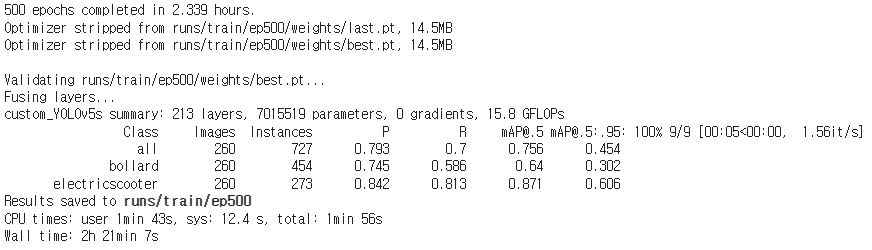

### 학습결과 best.pt에 대해 

In [ ]:
!python export.py --weights --optimize runs/train/es_results/weights/best.pt  --include torchscript

export: data=data/coco128.yaml, weights=['runs/train/es_results/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v6.2-88-g15e82d2 Python-3.7.13 torch-1.12.1+cu113 CPU

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/es_results/weights/best.pt with output shape (1, 25200, 7) (13.8 MB)

TorchScript: starting export with torch 1.12.1+cu113...
TorchScript: export success ✅ 3.8s, saved as runs/train/es_results/weights/best.torchscript.ptl (27.0 MB)

Export complete (4.8s)
Results saved to /content/yolov5/runs/train/es_results/weights
Detect:          python detect.py --weights runs/train/es_results/weights/best.torch

# Evaluation metric for object detection models 확인

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

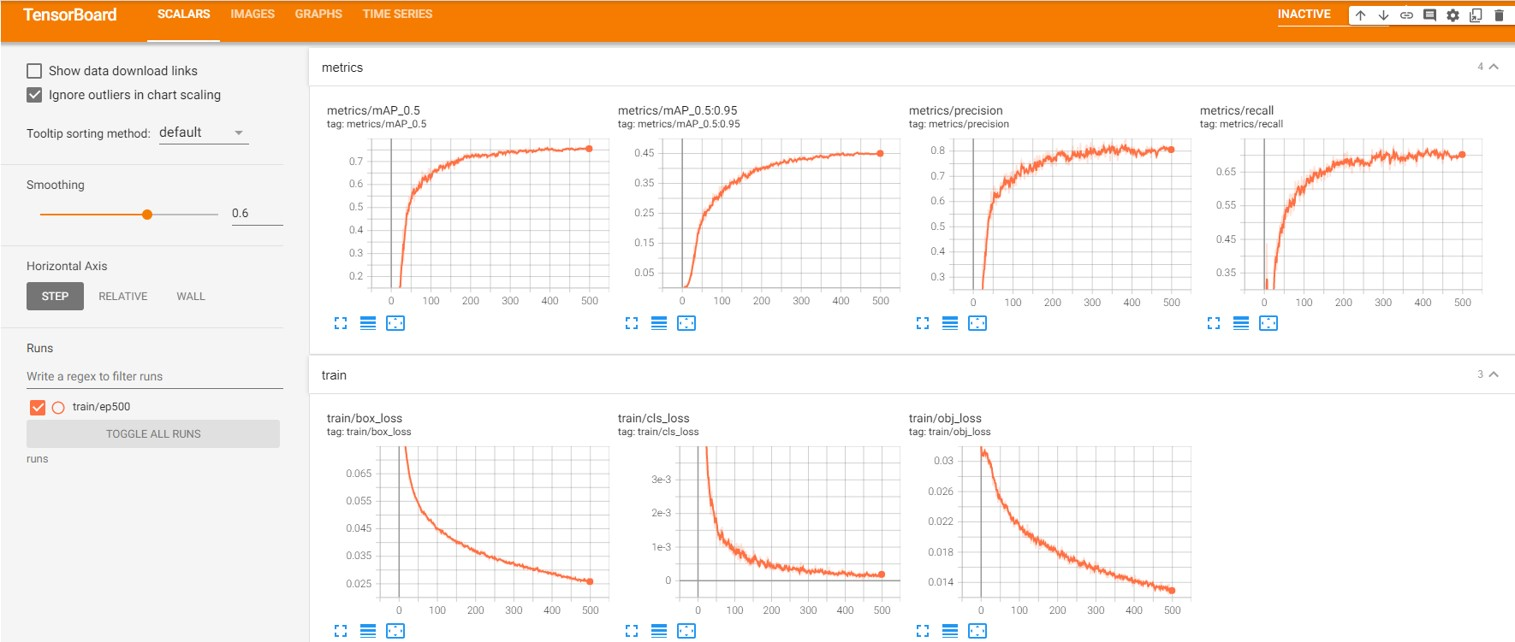

## 결과물 확인

In [ ]:
!pwd

/content/gdrive/MyDrive/bolles/yolov5


In [ ]:
!ls /content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500

confusion_matrix.png				    results.png
events.out.tfevents.1662277916.5fcf6b15e3f2.1147.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


## 학습한 결과 확인

In [ ]:
Image.open('/content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/results.png')

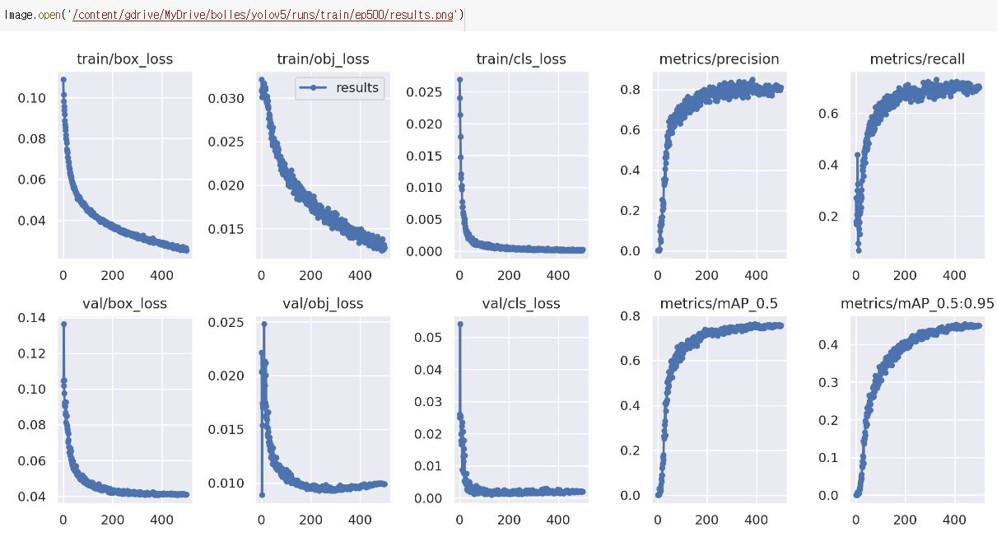

In [ ]:
Image.open('/content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/train_batch0.jpg')

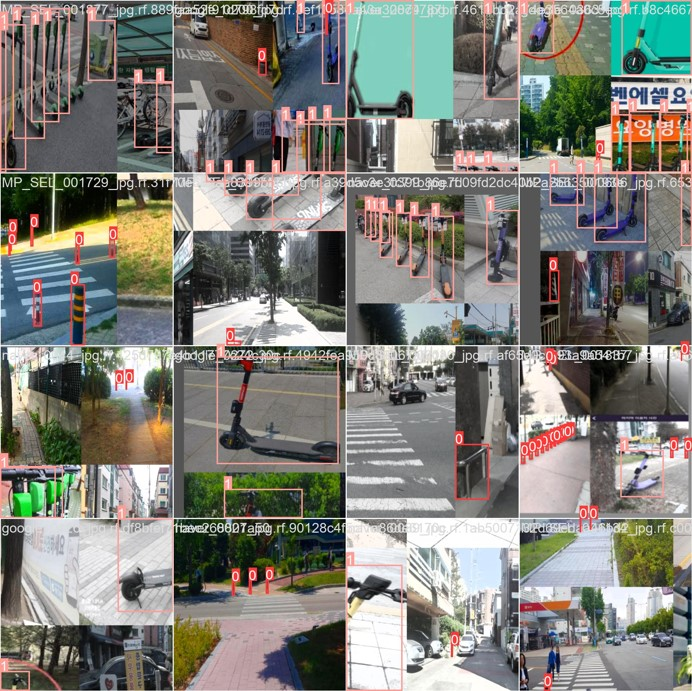

In [ ]:
Image.open('/content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/val_batch0_labels.jpg')

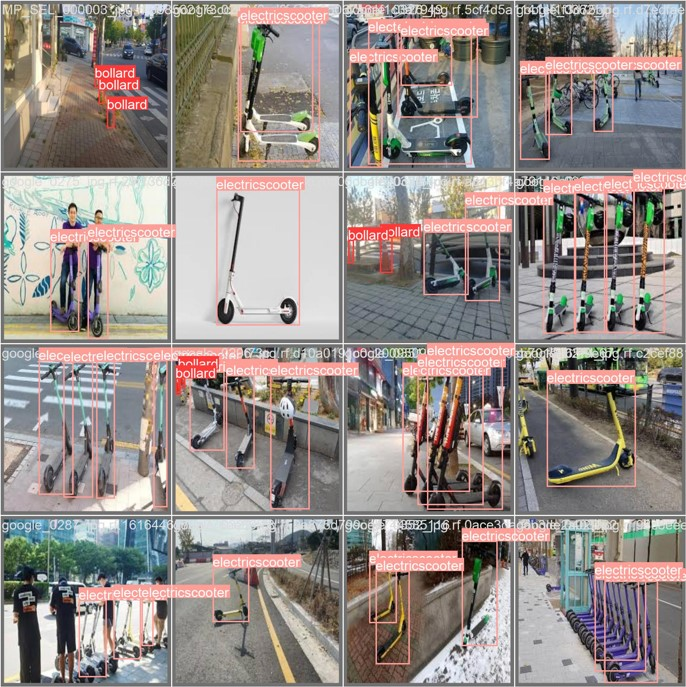

In [ ]:
Image.open('/content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/PR_curve.png')

# 모델 내보내기
* Android용 PyTorch Torchscript Lite model로 학습결과 모델을 export.py로 추출

In [ ]:
!python export.py --weights /content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/weights/best.pt --optimize --include torchscript

export: data=data/coco128.yaml, weights=['/content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=True, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v6.2-90-g63ecce6 Python-3.7.13 torch-1.10.0+cu102 CPU

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/weights/best.pt with output shape (1, 25200, 7) (13.8 MB)

TorchScript: starting export with torch 1.10.0+cu102...
TorchScript: export success ✅ 3.3s, saved as /content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/weights/best.torchscript.ptl (27.0 MB)

Export complete (4.3s)
Results saved to /content/gdrive/MyDrive/bolles/y

# 검증(Validation)

In [ ]:
%cd /content/gdrive/MyDrive/bolles/yolov5

/content/gdrive/MyDrive/bolles/yolov5


In [ ]:
!python val.py --weights runs/train/ep500/weights/best.pt --data ./bolles/data.yaml --img 640 --iou 0.65 --half 

val: data=./bolles/data.yaml, weights=['runs/train/ep500/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.2-90-g63ecce6 Python-3.7.13 torch-1.10.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/gdrive/MyDrive/bolles/yolov5/bolles/valid/labels.cache' images and labels... 260 found, 0 missing, 1 empty, 0 corrupt: 100% 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 9/9 [00:06<00:00,  1.44it/s]
                   all        260        727      0.781      0.709      0.754      0.454
               bollard        260        454      0.739      0.588 

In [ ]:
!python val.py --weights runs/train/ep500/weights/best.pt --data ./bolles/data.yaml --img 640 --task test # test로 수행

val: data=./bolles/data.yaml, weights=['runs/train/ep500/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-90-g63ecce6 Python-3.7.13 torch-1.10.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/gdrive/MyDrive/bolles/yolov5/bolles/test/labels' images and labels...130 found, 0 missing, 0 empty, 0 corrupt: 100% 130/130 [00:00<00:00, 234.80it/s]
test: New cache created: /content/gdrive/MyDrive/bolles/yolov5/bolles/test/labels.cache
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 5/5 [00:04<00:00,  1.14it/s]
                   all        130        398      0.806      0.70

# 추론(Inference)

In [ ]:
%ls runs/train/ep500/weights

best.pt  best.torchscript  best.torchscript.ptl  last.pt


In [ ]:
!python detect.py --weights runs/train/ep500/weights/best.pt --img 640 --conf 0.4 --source ./bolles/test/images # test 이미지에 대해 detection

## 결과를 random하게 보기

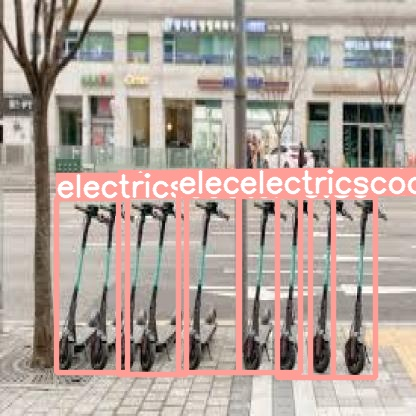

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/gdrive/MyDrive/bolles/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [ ]:
!python detect.py --weights /content/gdrive/MyDrive/bolles/yolov5/runs/train/ep500/weights/best.pt --img 640 --conf 0.4 --source /content/gdrive/MyDrive/yolov5_sidewalk/mp4/sun-5.mp4 # 영상에 대해 detection

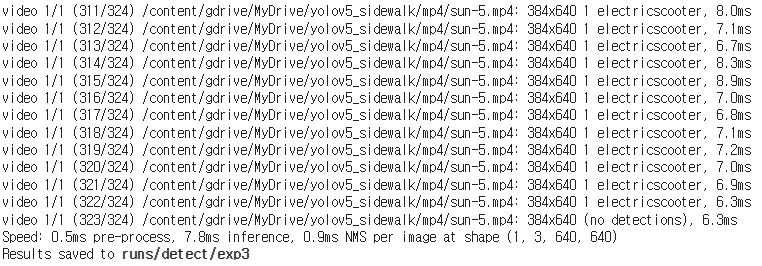